In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_bkg_red_vals_new.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red_vals_newest.csv'%(i)).drop(columns = 'Unnamed: 0')], ignore_index=True) 

In [3]:
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,vals,lead_ntrk,sub_ntrk,labels
0,1888.168945,1.829987,201.025452,0.839641,-1.037925,31,37,1000,-40.242415,-42.777139,0
1,2389.667480,2.411867,3.136414,1.571662,-0.880877,52,55,1000,-21.474150,-28.299496,0
2,1293.717407,0.340623,10.156311,-0.436375,-0.096425,34,23,1000,-32.641184,-50.163837,0
3,1986.557251,1.809374,59.459229,1.076468,-0.814361,41,37,1000,-30.780724,-43.602455,0
4,1270.481201,0.580307,226.615509,-0.263168,0.367645,50,65,1000,-16.408087,-7.843346,0
...,...,...,...,...,...,...,...,...,...,...,...
2654995,2686.224854,1.818661,211.678955,0.903337,-0.919513,58,129,3500,-16.311280,44.333506,4
2654996,2692.715088,0.938040,136.215576,0.324722,-0.615071,78,78,3500,3.673315,-6.691277,4
2654997,2476.301514,0.264742,106.248535,0.488685,0.740875,200,96,3500,126.251694,12.251655,4
2654998,2140.740234,1.310556,192.544434,-0.370099,0.945993,134,99,3500,61.481212,17.241032,4


In [50]:
sample = df.sample(1000)

In [51]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = 10000#*abs(corr_r)
    ax.scatter([.5], [.5], 
               marker_size, 
               [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size =  5+40*abs(corr_r)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=30)

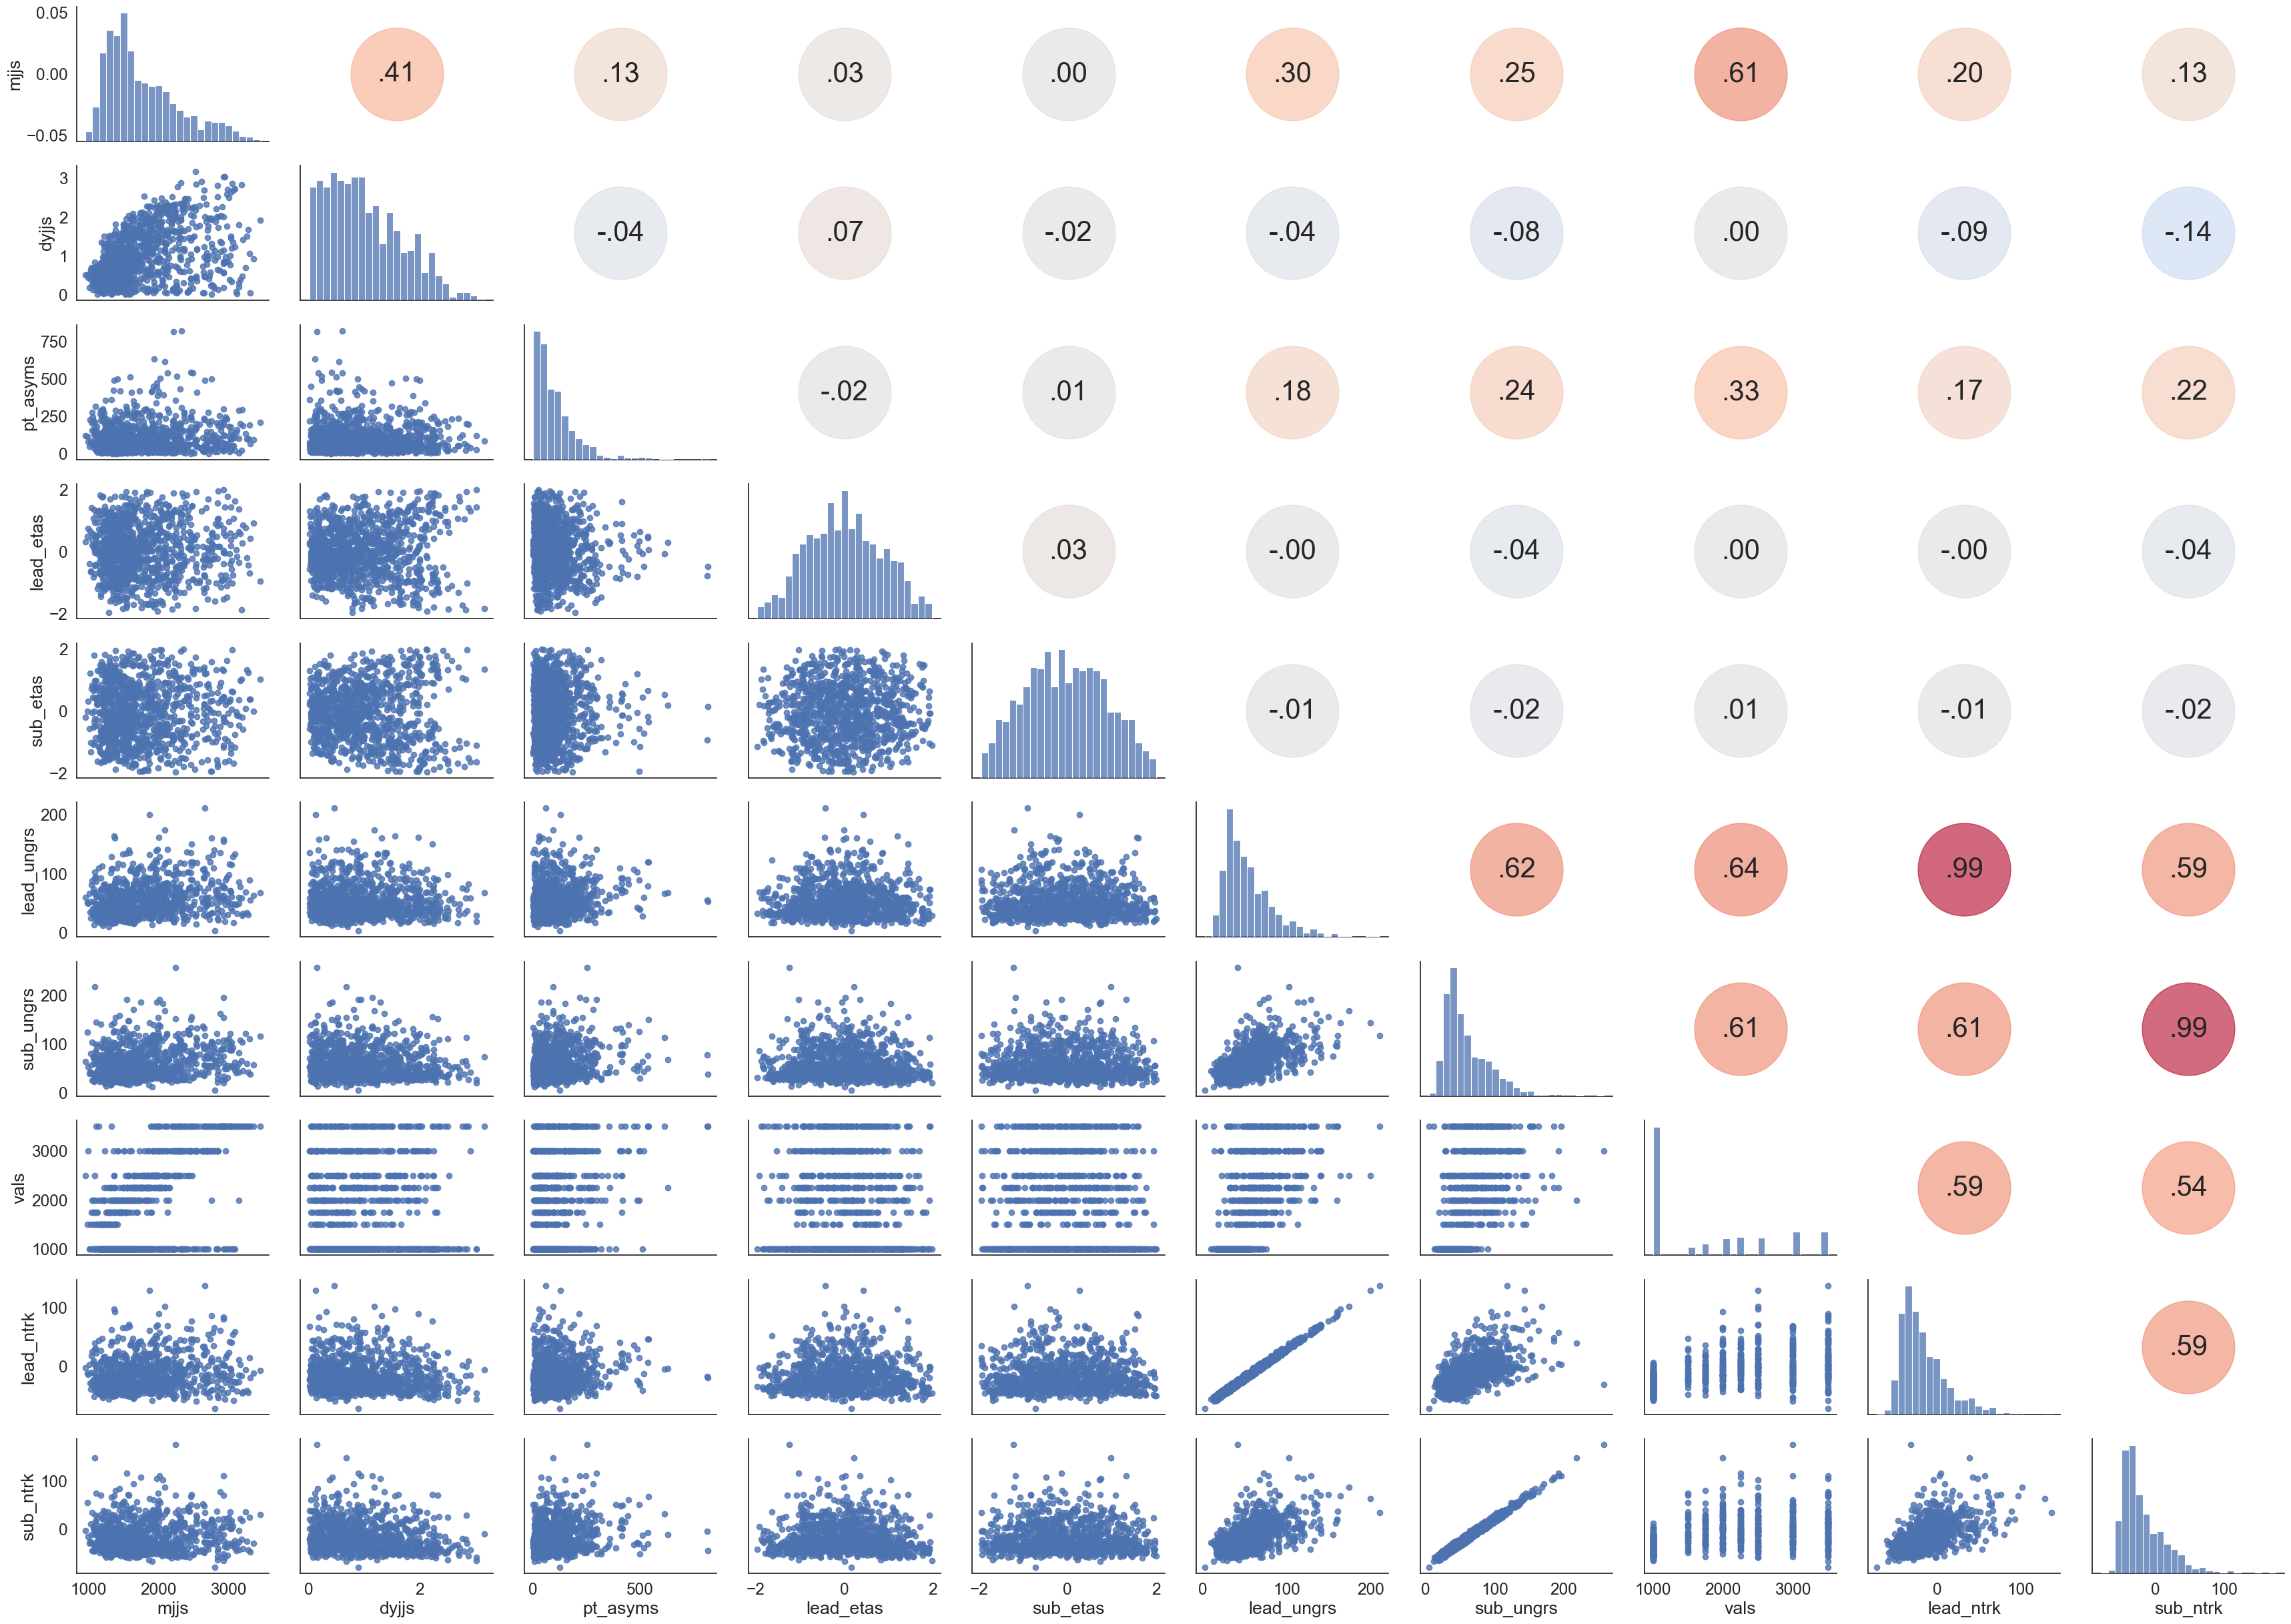

In [52]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(sample.iloc[:,:-1], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, fit_reg=False, ci=False)
g.map_diag(sns.histplot, bins=25)
g.map_upper(corrdot)
plt.savefig('pearson_corr_vals_ntrk.png')
plt.show()

In [13]:
plt.savefig('pearson_corr_vals.png')
plt.savefig('pearson_corr_vals.pdf')

In [26]:
df = pd.read_csv('df_bkg_red.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red.csv'%(i)).drop(columns = 'Unnamed: 0')]) 

In [27]:
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,weights,labels
0,1143.592529,0.039967,146.150787,0.525687,0.505117,38,48,1.003236e+00,0
1,1476.433716,1.387635,14.246826,-1.370057,0.113648,21,33,1.136396e+00,0
2,1540.057007,1.520813,94.611481,1.142746,-0.478356,46,31,2.008979e+00,0
3,1533.117432,1.955224,79.998779,-0.021801,1.994529,46,37,6.744341e+00,0
4,1164.201416,0.747826,97.815399,-0.216873,0.608687,40,45,7.691056e+00,0
...,...,...,...,...,...,...,...,...,...
258443,2686.224854,1.818661,211.678955,0.903337,-0.919513,58,129,1.238581e-11,4
258444,2692.715088,0.938040,136.215576,0.324722,-0.615071,78,78,2.048238e-09,4
258445,2476.301514,0.264742,106.248535,0.488685,0.740875,200,96,1.438433e-09,4
258446,2140.740234,1.310556,192.544434,-0.370099,0.945993,134,99,3.750820e-10,4


In [31]:
sample = df.sample(1000, ignore_index=True)

In [32]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

In [33]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(sample.iloc[:,:7], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

<Figure size 640x480 with 0 Axes>

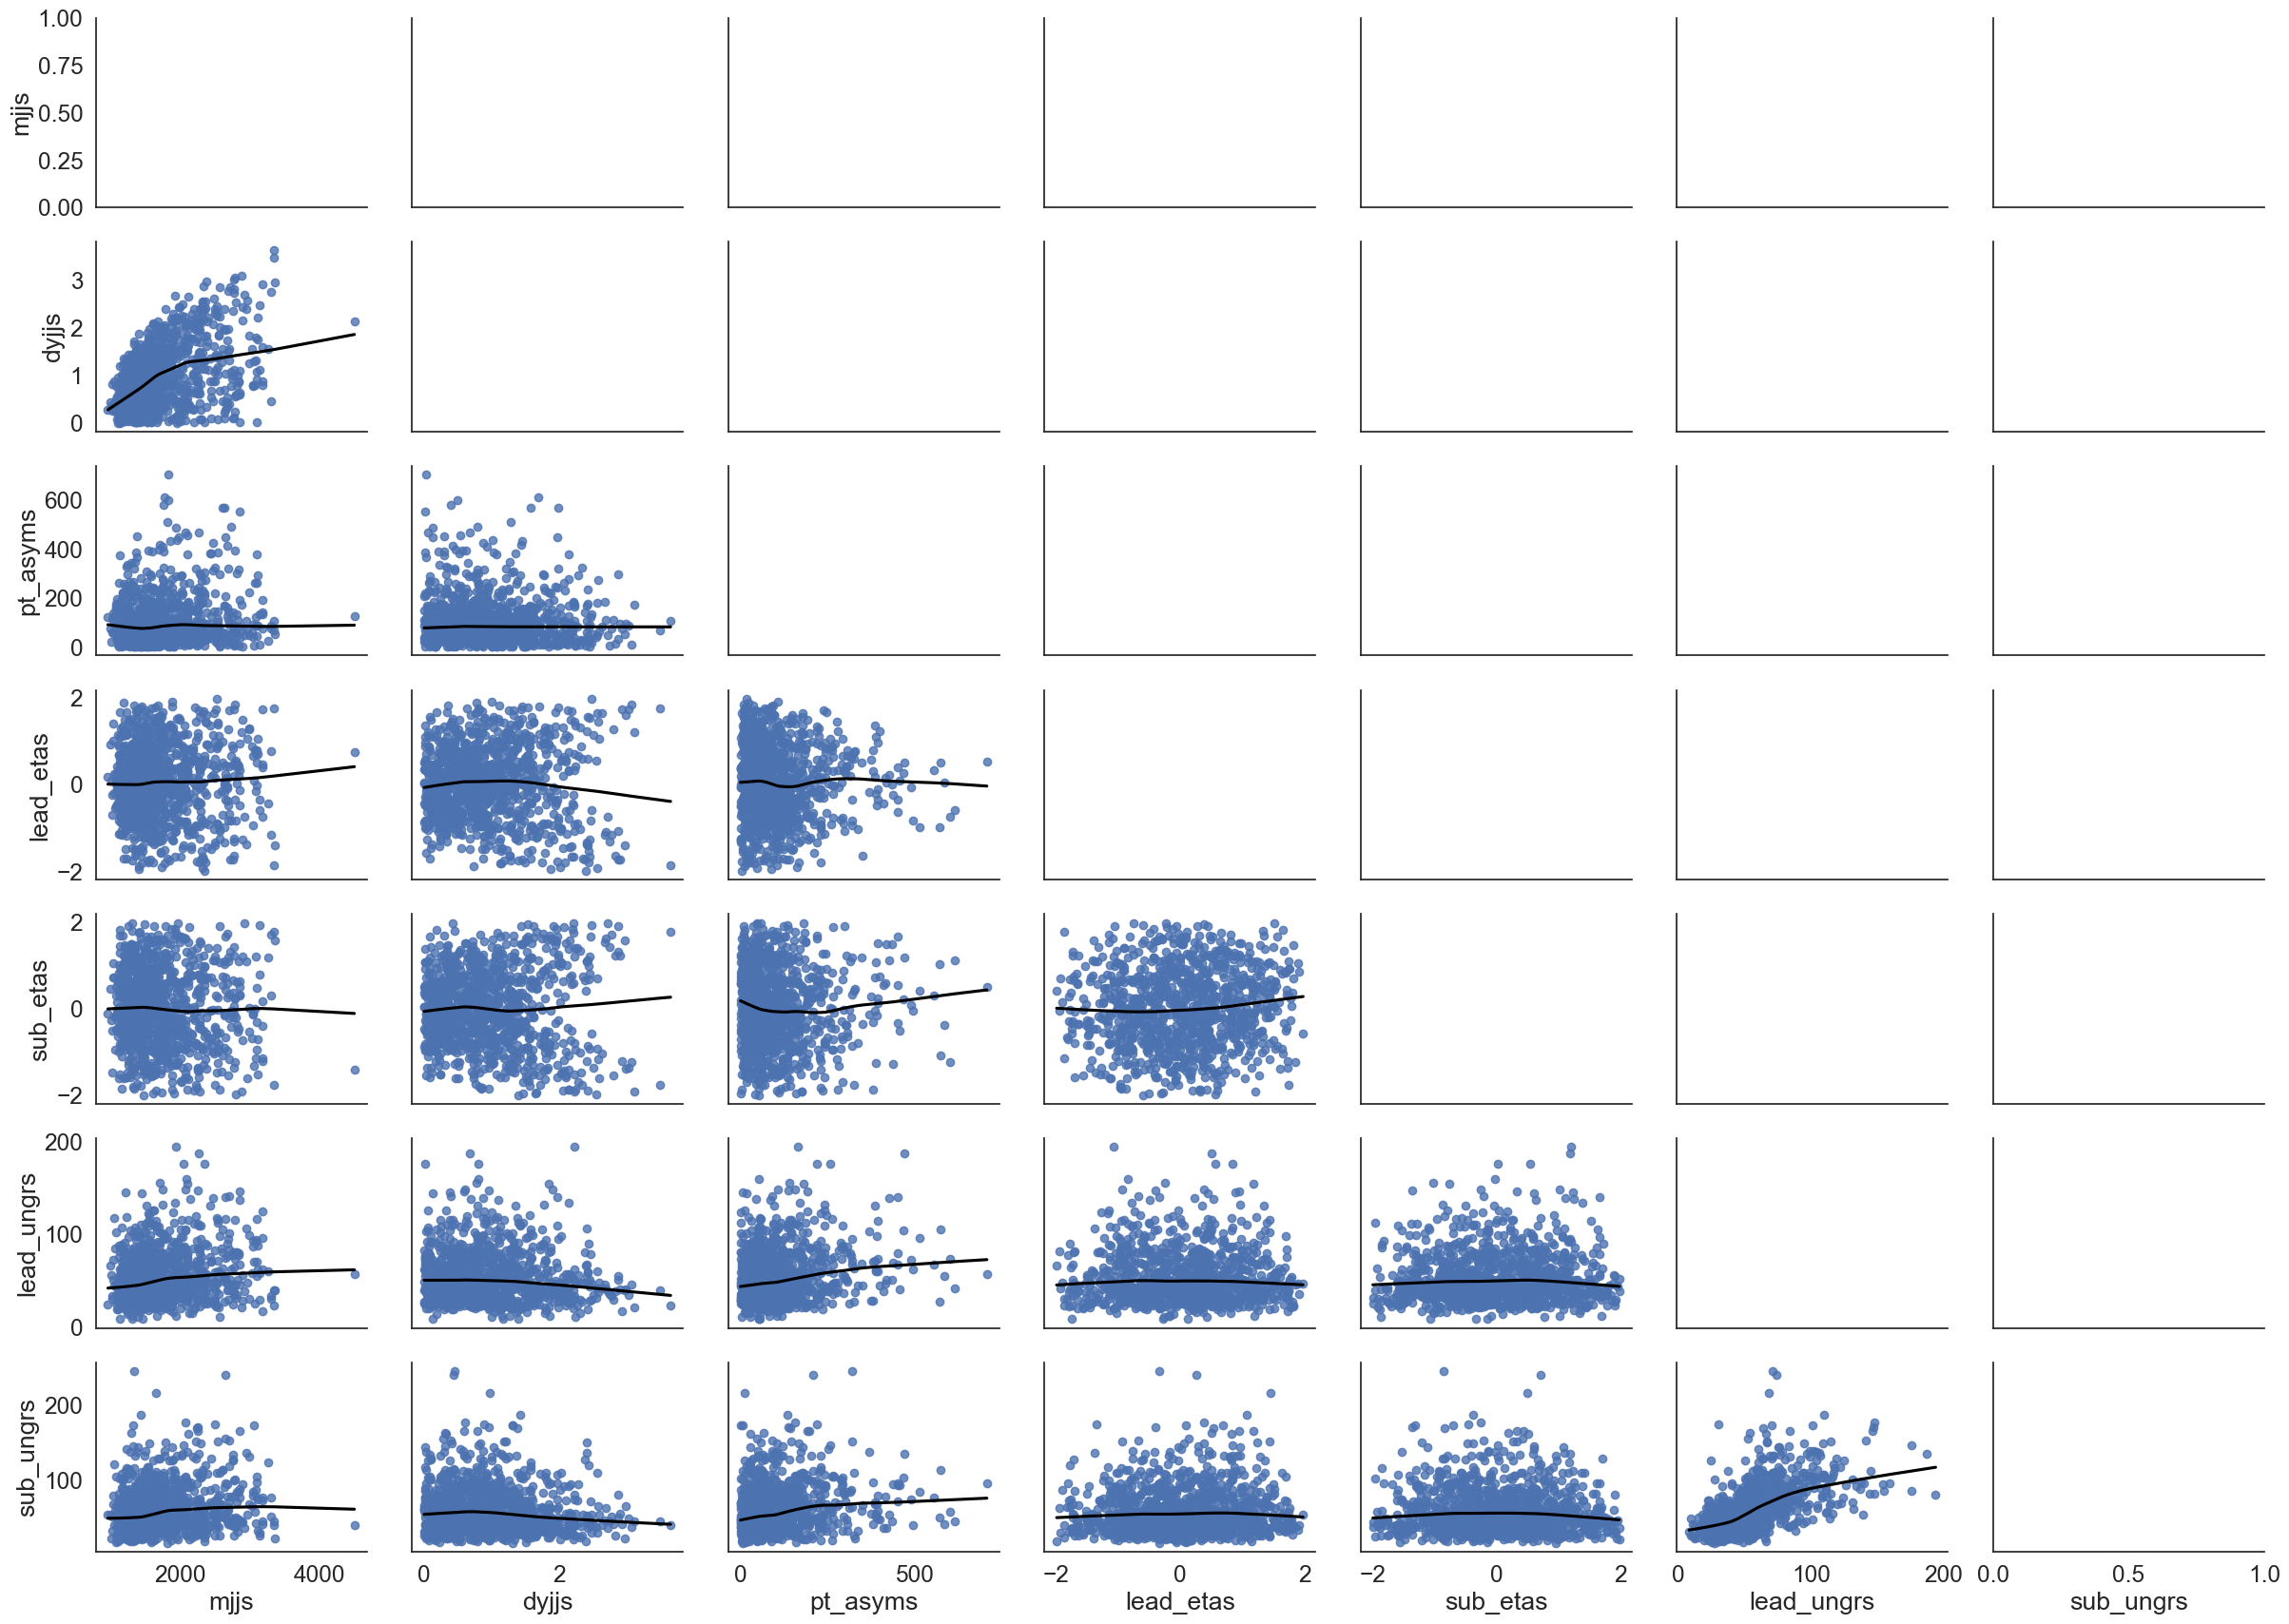

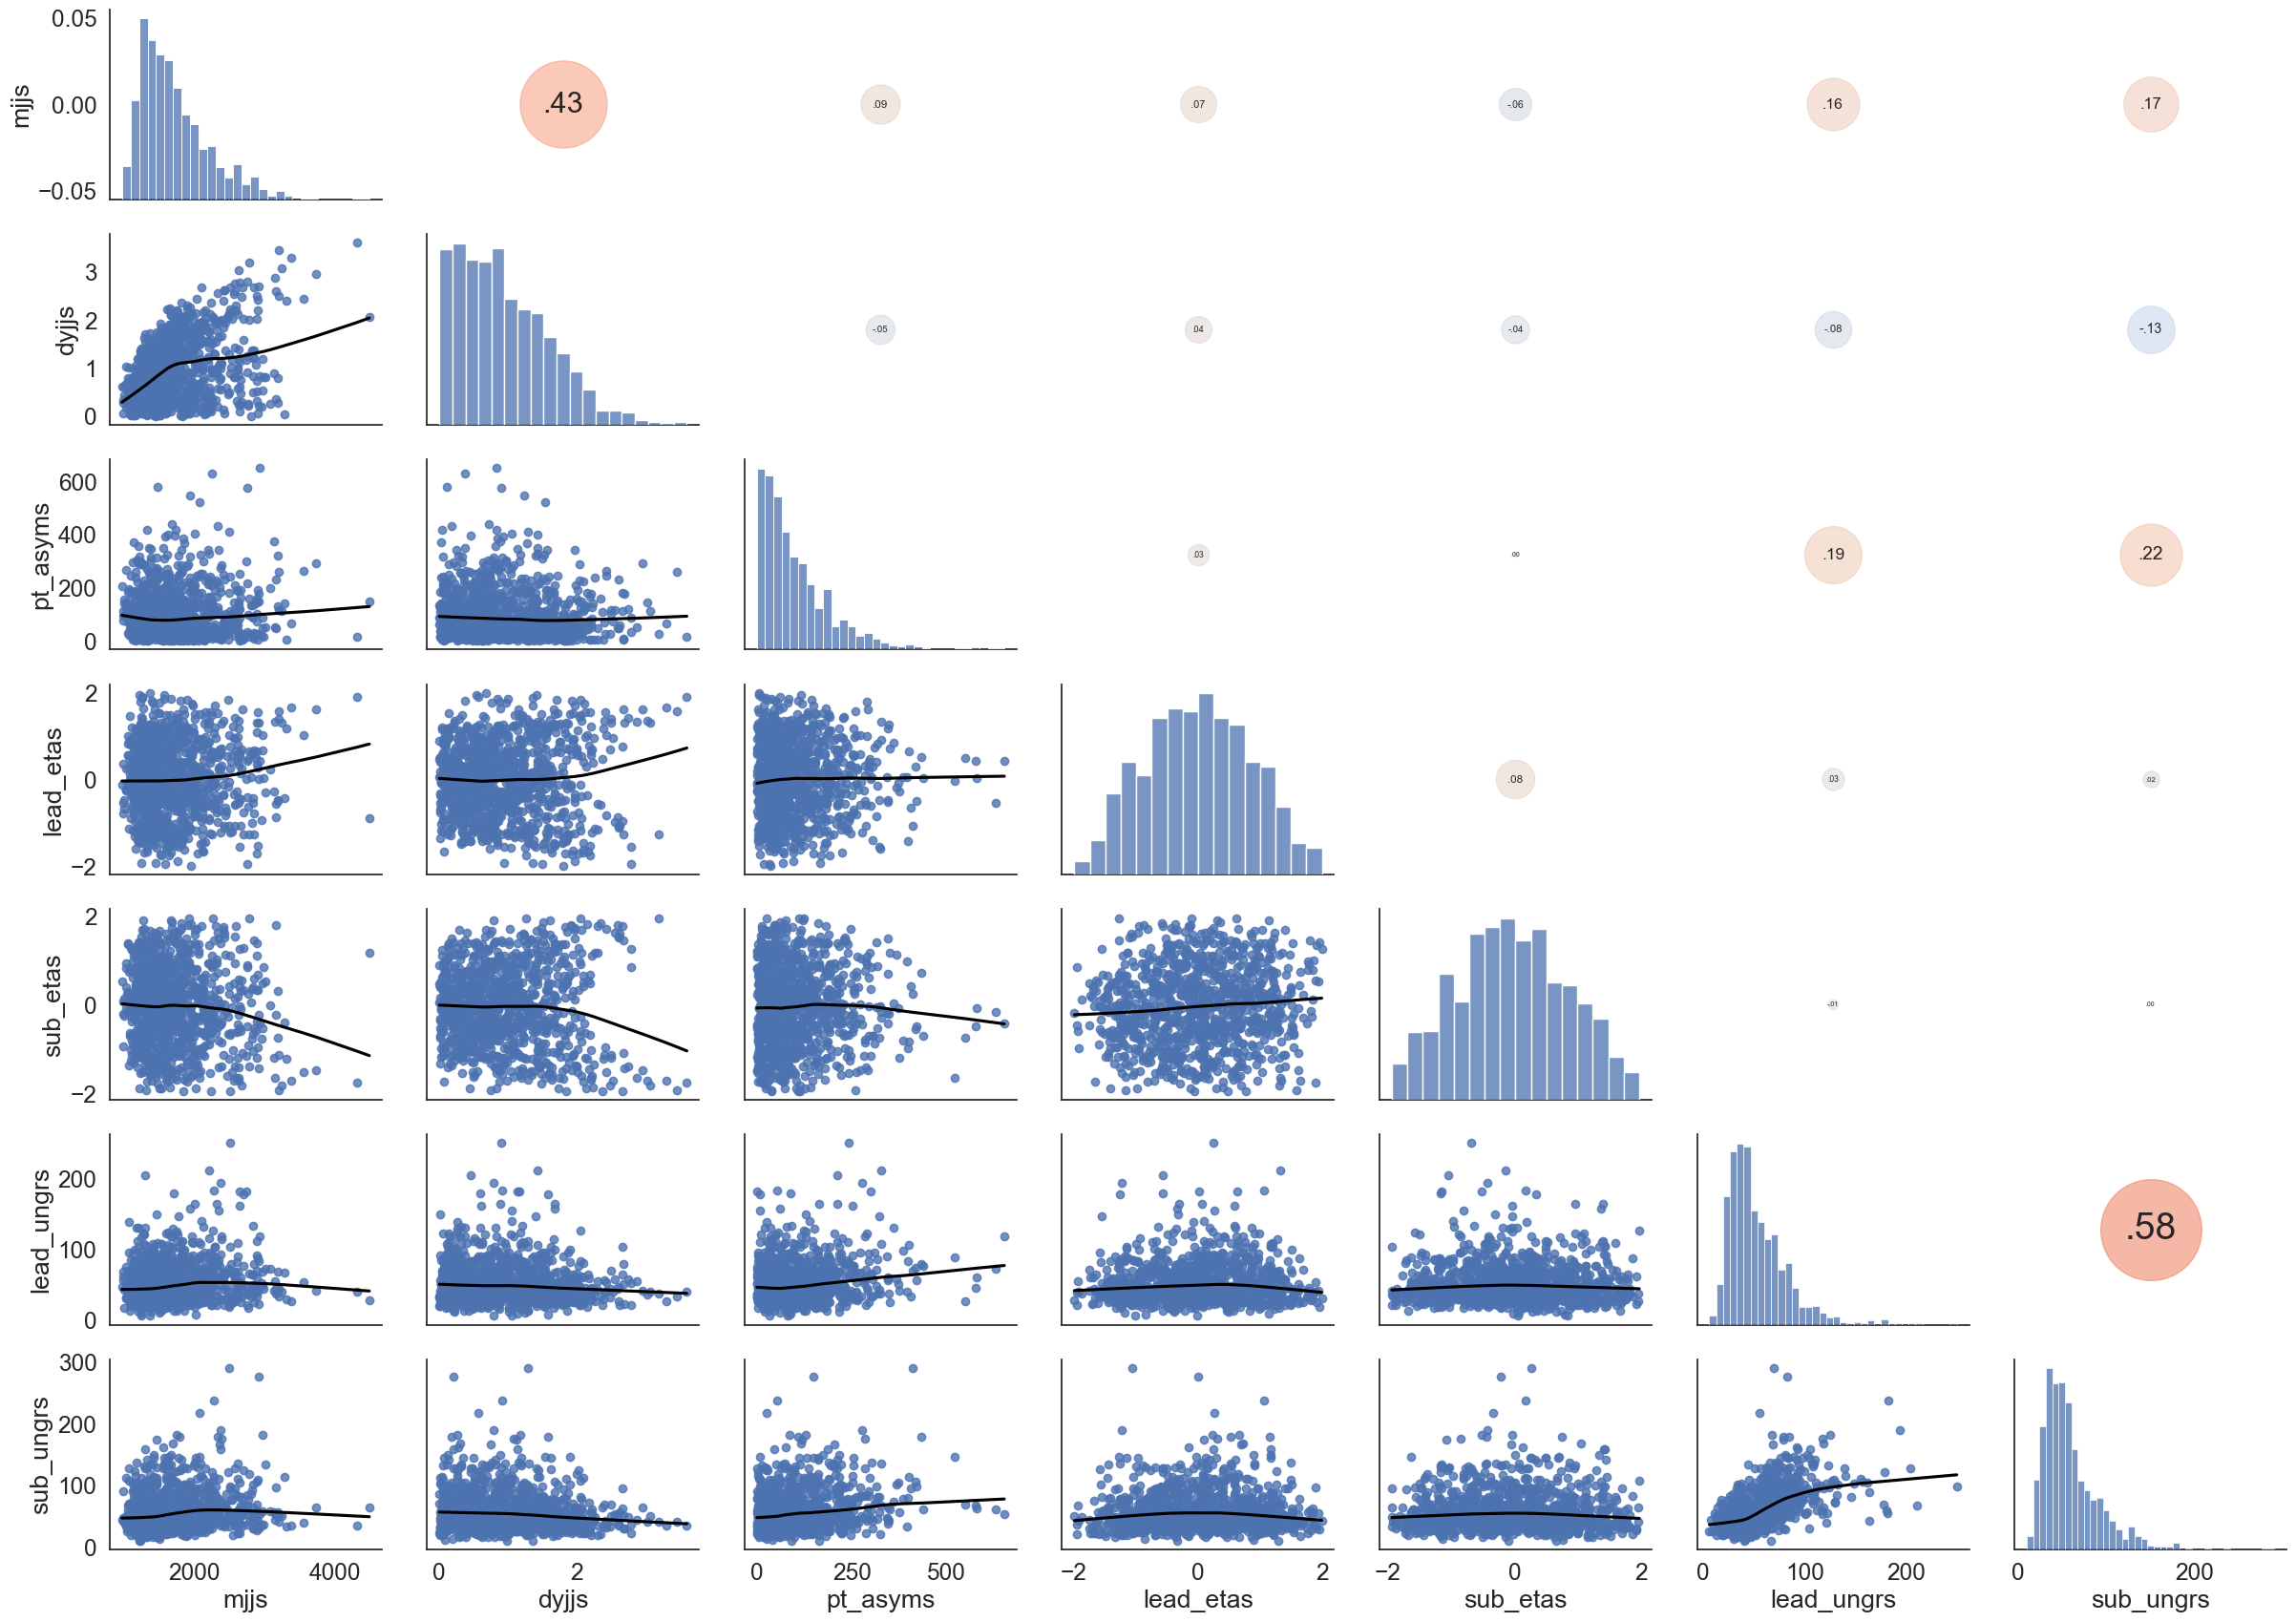

In [34]:
plt.show()

In [35]:
plt.savefig('pearson_corr.png')
plt.savefig('pearson_corr.pdf')